<a href="https://colab.research.google.com/github/vivorima/FuzzyCMeans-ImageSegmentation/blob/main/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Reconnaissance de formes sur Fuzzy image clustering





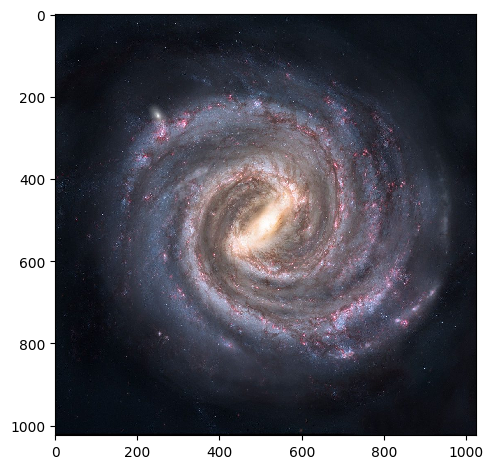

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

# reading and converting
image = io.imread('/content/milky-way.jpg')
io.imshow(image)
gray_image = color.rgb2gray(image)

# we get a 1D array
pixel_intensities = gray_image.flatten()

# we have to reshape it to 2D because of numpy
pixel_intensities_2d = pixel_intensities.reshape(-1, 1)

# Paramètres
* J'appelle epsilon la tolérance de la distance entre uk et uk+1
* J'ajoute max_iterations pour arrêter les algorithmes au cas où nous n'atteindrions jamais la convergence.
* fuzziness est le degré de "flou" que nous voulons.

In [ ]:
num_clusters = 3  # k
fuzziness = 2  # m
max_iterations = 100 # in case we never reach convergence, I halt
num_pixels = pixel_intensities.shape[0]
epsilon = 1e-9

# Step 1: random U matrix
u_matrix = np.random.rand(num_pixels, num_clusters)

# FCM

* on commence par calculer le centre des clusters avec la formule donnée
* on calcule les distances entre nos xi et le centre des clusters
* on update la U(k+1)
* on utilise distance euclidean to check for la convergence
* re iterate


In [ ]:
for iteration in range(max_iterations):
    # Step 2: Calculate cluster centers
    cluster_centers = np.dot(u_matrix.T**fuzziness, pixel_intensities_2d) / np.sum(u_matrix**fuzziness, axis=0)[:, np.newaxis]

    # Step 3: Update u matrix
    distances = np.linalg.norm(pixel_intensities_2d[:, np.newaxis] - cluster_centers, axis=2)

    u_matrix_next = 1 / np.sum((distances[:, :, np.newaxis] / distances[:, np.newaxis, :])**(2 / (fuzziness - 1)), axis=2)

    # Step 4: Check for convergence with Euclidean distance
    if np.linalg.norm(u_matrix_next - u_matrix) < epsilon:
        break

    # Update for the next iteration
    u_matrix = u_matrix_next

# Segmentation de l'image
On prends le max des appartenances pour chaque cluster



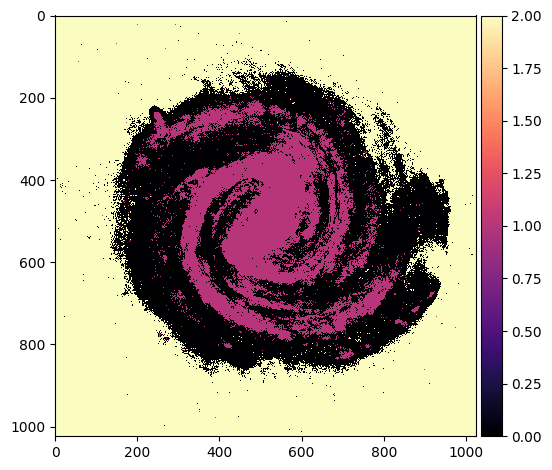

In [ ]:
segmentation = np.argmax(u_matrix, axis=1)
segmented_image = segmentation.reshape(gray_image.shape)
io.imshow(segmented_image, cmap='magma')

# Heatmaps

Pour chaque cluster, on crée une image ou l'intensité des pixels est prise pour chaque cluster apres on reshape au size de l'image org


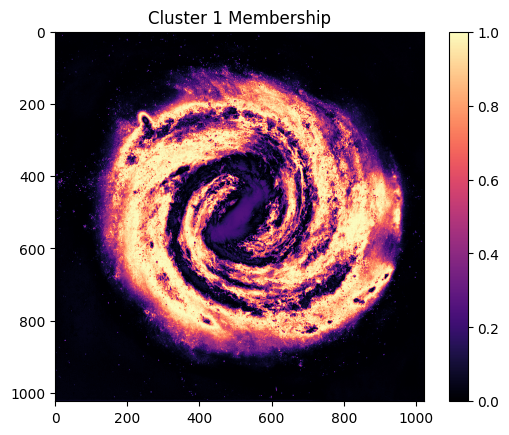

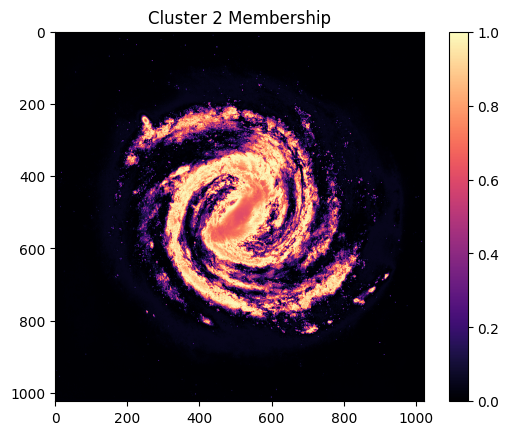

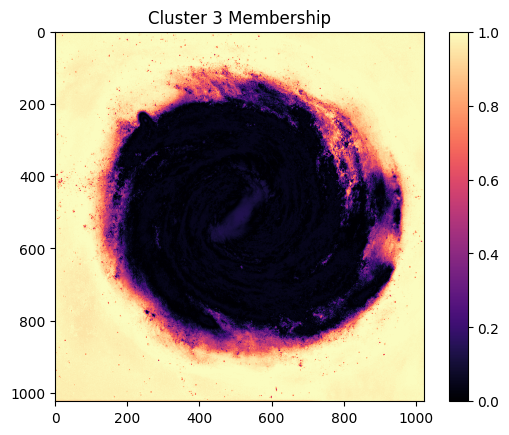

In [ ]:
# Affiche les heatmaps pour chaque cluster
for cluster_idx in range(num_clusters):
    heatmap = u_matrix[:, cluster_idx].reshape(gray_image.shape)
    plt.imshow(heatmap, cmap='magma', vmin=0, vmax=1)
    plt.title(f'Cluster {cluster_idx + 1} Membership')
    plt.colorbar()
    plt.show()